In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm

# Case 1

### Insurance Level
Categorical: bronze, silver, gold

### Age
Int

### Sex
Binary

### Number of dependents
Int

### if customer has chronic diseases
Binary

### Employment type 
Categorical

### industry that the person works
Categorical

### Annual income 
Float

### if customer has bought any insurance before
Binary


In [2]:
columns = ["Age", "Sex", "Annual Income", "Employment type", "Industry", "Family Members", "Chronic Disease", "Insurance Level"]

In [3]:
np.random.seed(0)
n_rows = 50000

In [4]:
age = (np.random.beta(3,2,size=(n_rows,))*60).astype(int)+18

<AxesSubplot:ylabel='Count'>

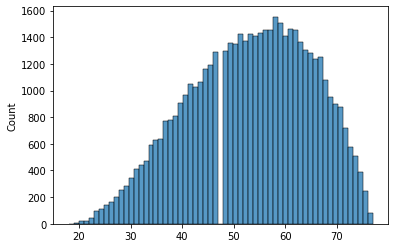

In [5]:
sns.histplot(age)

In [6]:
sex = np.random.choice(["Female","Male"],size=(n_rows,),p=[0.55,0.45])

/home/markussagen/.pyenv/versions/sidekick/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

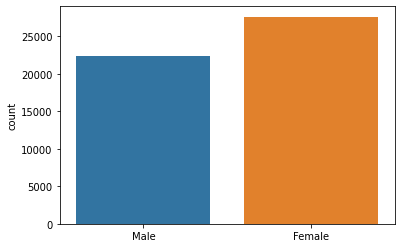

In [7]:
sns.countplot(sex)

In [8]:
dependents = np.zeros((n_rows,)).astype(int)
for i in range(n_rows):
    if age[i] < 20:
        weights = [0.95,0.03,0.02,0,0]
    elif age[i] < 30:
        weights = [0.6,0.2,0.1,0.1,0]
    else:
        weights = [0.15,0.18,0.33,0.22,0.12]
    dependents[i] = np.random.choice([0,1,2,3,4],p=weights)

/home/markussagen/.pyenv/versions/sidekick/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

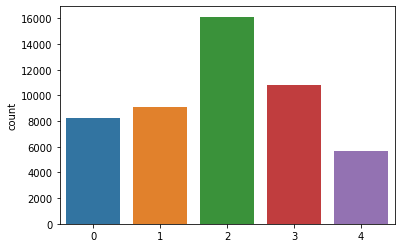

In [9]:
sns.countplot(dependents)

In [10]:
has_disease = np.zeros((n_rows,)).astype(int)
for i in range(n_rows):
    if age[i] < 30:
        weights = [4/5,1/5]
    elif age[i] < 60:
        weights = [0.6,0.4]
    else:
        weights = [0.3, 0.7]
    has_disease[i] = np.random.choice([0,1],p=weights)

/home/markussagen/.pyenv/versions/sidekick/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

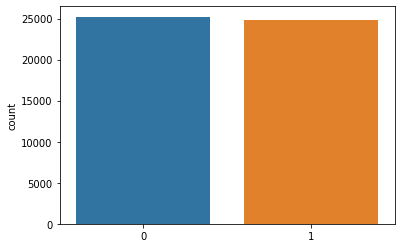

In [11]:
sns.countplot(has_disease)

In [12]:
employment = np.zeros((n_rows,)).astype(str)
for i in range(n_rows):
    if age[i] < 25:
        weights = [0.08,0.62,0.3]
    elif age[i] < 60:
        weights = [0.08,0.736,0.184]
    else:
        weights = [0.08,0.62,0.3]
    employment[i] = np.random.choice(["Unemployed", "Full-time", "Part-time"],p=weights)

/home/markussagen/.pyenv/versions/sidekick/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

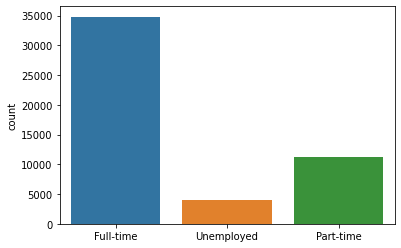

In [13]:
sns.countplot(employment)

In [14]:
industry_dict = {
    "Agriculture": 46000,
    "Construction": 350000,
    "Manufacturing": 530000,
    "Service": 250000,
    "IT": 215000,
    "Retail": 580000,
    "Healthcare": 220000,
}
total = 0
for key, val in industry_dict.items():
    total += val
weights = []
for key, val in industry_dict.items():
    weights.append(val/total)

industry = np.zeros((n_rows,)).astype(str)
industries = ["Agriculture", "Construction", "Manufacturing", "Service", "IT", "Retail", "Healthcare"]
for i in range(n_rows):
    if employment[i] == "Unemployed":
        industry[i] = "N/A"
    else:
        industry[i] = np.random.choice(industries,p=weights)

/home/markussagen/.pyenv/versions/sidekick/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

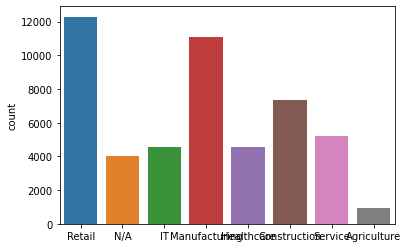

In [15]:
sns.countplot(industry)

In [16]:
income = np.zeros((n_rows,)).astype(int)
income_dict = {
    "Agriculture": 31100,
    "Construction": 70420,
    "Manufacturing": 76390,
    "Service": 61000,
    "IT": 147000,
    "Retail": 42900,
    "Healthcare": 61000,
}
for i in range(n_rows):
    factor = 1
    if sex[i] == "Female":
        factor = 0.83
    if employment[i] == "Unemployed":
        income [i] = 0
        continue
    elif employment[i] == "Part-time":
        factor *= 0.5
    inc = factor * income_dict[industry[i]]  
    
    income[i] = int(inc + np.random.randn()*0.1*inc)


<AxesSubplot:ylabel='Count'>

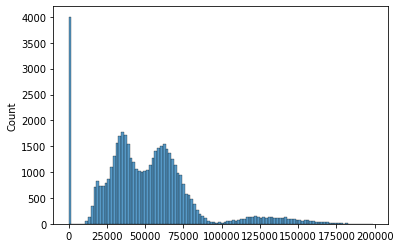

In [17]:
sns.histplot(income)

In [18]:
prev_insurance = np.zeros((n_rows,)).astype(int)
for i in range(n_rows):
    if age[i] < 25:
        weights = [0.5,0.5]
    elif age[i] < 60:
        weights = [0.4,0.6]
    else:
        weights = [0.35, 0.65]
    prev_insurance[i] = np.random.choice([0,1],p=weights)

/home/markussagen/.pyenv/versions/sidekick/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

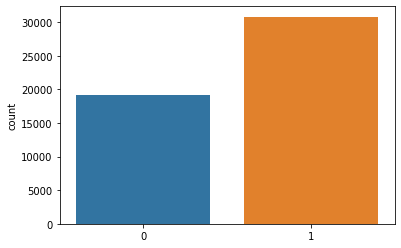

In [19]:
sns.countplot(prev_insurance)

In [20]:
score = np.zeros((n_rows,))
max_income = income.max()
for i in range(n_rows):
    s = age[i]
    if sex[i] == "Female":
        s -= 5 - 5 * np.random.random_sample()
    s += dependents[i] * (5 + 10 *np.random.random_sample())
    disease_score = 5 + np.random.sample() * 5
    if has_disease[i]:
        disease_score *= -1
    s += disease_score
    et = employment[i]
    if et == "Agriculture" or et == "Construction" or et == "Manufacturing":
        s += 3 + np.random.sample() * 2
    elif et != "N/A":
        s += 5 + np.random.sample() * 10
    inc_score = income[i]/max_income * 20
    inc_score = inc_score + 0.01 * np.random.randn() * inc_score
    s += inc_score
    if prev_insurance[i]:
        s += 5 + np.random.sample() * 10
    score[i] = s
score = (score - score.min()) / (score.max() - score.min())
score *= 100
score = score.astype(int)
    

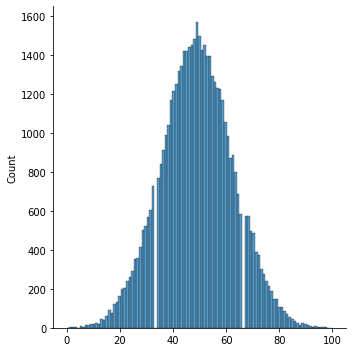

In [21]:
sns.displot(score)

In [22]:
score_level = np.zeros((n_rows,)).astype(str)
for i in range(n_rows):
    if score[i] < 40:
        score_level[i] = "Bronze"
    elif score[i] < 60:
        score_level[i] = "Silver"
    else:
        score_level[i] = "Gold"

/home/markussagen/.pyenv/versions/sidekick/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

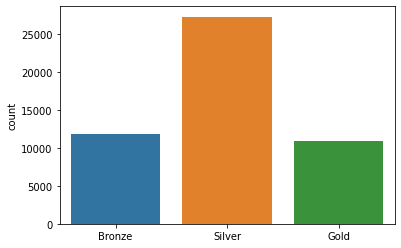

In [23]:
sns.countplot(score_level)

In [24]:
col_dict = {
    "Age": age, 
    "Sex": sex, 
    "Number of Dependents": dependents,
    "Has Chronic Disease": has_disease,
    "Employment type": employment, 
    "Industry": industry, 
    "Annual Income (USD)": income, 
    "Previously Bought insurance": prev_insurance,
    "Insurance Score": score,
    "Insurance Level": score_level
}

In [25]:
df = pd.DataFrame.from_dict(col_dict)
df

,Age,Sex,Number of Dependents,Has Chronic Disease,Employment type,Industry,Annual Income (USD),Previously Bought insurance,Insurance Score,Insurance Level
0,62,Male,2,1,Full-time,Retail,39450,0,39,Bronze
1,72,Female,2,0,Unemployed,N/A,0,0,49,Silver
2,49,Male,3,0,Full-time,IT,138191,0,62,Gold
3,59,Male,2,1,Full-time,Manufacturing,71438,1,54,Silver
4,55,Female,2,0,Full-time,Retail,34174,0,44,Silver
...,...,...,...,...,...,...,...,...,...,...
49995,38,Female,1,1,Full-time,Healthcare,55294,0,22,Bronze
49996,33,Male,2,0,Full-time,IT,138666,0,42,Silver
49997,42,Female,1,1,Full-time,Healthcare,48203,0,25,Bronze
49998,59,Male,2,0,Unemployed,N/A,0,1,66,Gold


In [26]:
df.to_csv("synthetic_insurance.csv")

## Fixed missing values

In [27]:
df.loc[df["Employment type"]=="Unemployed","Industry"] = np.nan
df.loc[df["Employment type"]=="Unemployed","Annual Income (USD)"] = np.nan

## Random Noise and incorrect types

In [28]:
def replace_str(num):
    replace = np.random.choice([True,False],p=[0.1,0.9])
    if replace:
        num = "\"" + str(num) + "\""
    return num

In [29]:
def replace_nan(val, p):
    replace = np.random.choice([True,False],p=[p,1-p])
    if replace:
        val = np.nan
    return val

In [30]:
for i in tqdm(range(n_rows)):
    df.loc[i,"Number of Dependents"] = replace_str(df.loc[i,"Number of Dependents"])
    df.loc[i,"Annual Income (USD)"] = replace_nan(df.loc[i,"Annual Income (USD)"],0.05)
    df.loc[i,"Previously Bought insurance"] = replace_nan(df.loc[i,"Previously Bought insurance"],0.1)
    df.loc[i,"Insurance Score"] = replace_nan(df.loc[i,"Insurance Score"],0.01)
    if df.loc[i,"Insurance Score"] == np.nan:
        df.loc[i,"Insurance Level"] = np.nan
    
    

  0%|          | 0/50000 [00:00<?, ?it/s]

## Duplicate Rows

In [31]:
n_duplicates = n_rows//100
dupl_idxs = np.array(range(n_rows))
dupl_idxs = np.random.permutation(n_rows)
dupl_idxs = dupl_idxs[:n_duplicates]

df = pd.concat([df, df.iloc[dupl_idxs]])

In [32]:
df["Date"] = "2021-10-09"
df["Insured"] = True

In [33]:
df

,Age,Sex,Number of Dependents,Has Chronic Disease,Employment type,Industry,Annual Income (USD),Previously Bought insurance,Insurance Score,Insurance Level,Date,Insured
0,62,Male,2,1,Full-time,Retail,39450.0,0.0,39.0,Bronze,2021-10-09,True
1,72,Female,2,0,Unemployed,NaN,NaN,0.0,49.0,Silver,2021-10-09,True
2,49,Male,3,0,Full-time,IT,138191.0,0.0,62.0,Gold,2021-10-09,True
3,59,Male,2,1,Full-time,Manufacturing,71438.0,1.0,54.0,Silver,2021-10-09,True
4,55,Female,2,0,Full-time,Retail,34174.0,0.0,44.0,Silver,2021-10-09,True
...,...,...,...,...,...,...,...,...,...,...,...,...
13609,60,Male,1,1,Full-time,Service,55223.0,0.0,37.0,Bronze,2021-10-09,True
13274,59,Female,4,0,Full-time,Manufacturing,69919.0,0.0,69.0,Gold,2021-10-09,True
14455,53,Female,0,0,Full-time,Manufacturing,54434.0,NaN,44.0,Silver,2021-10-09,True
9570,45,Female,2,1,Part-time,Manufacturing,30590.0,0.0,34.0,Bronze,2021-10-09,True


In [34]:
df.to_csv("synthetic_insurance_ruined.csv")